<a href="https://colab.research.google.com/github/therokitoki/AA2_TP_Alsop-Hachen-Nemeth/blob/main/ejercicio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

REPO_NAME = "AA2_TP_Alsop-Hachen-Nemeth"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/therokitoki/{REPO_NAME}.git
  os.chdir(REPO_NAME)

Cloning into 'AA2_TP_Alsop-Hachen-Nemeth'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 88 (delta 36), reused 40 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (88/88), 752.34 KiB | 13.20 MiB/s, done.
Resolving deltas: 100% (36/36), done.


Librerias

In [2]:
import numpy as np
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Input, RandomFlip, RandomContrast, RandomTranslation, Flatten, Dropout
from tensorflow.keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Rescaling
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import Model, Sequential

In [3]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
!gdown 1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ

Downloading...
From (original): https://drive.google.com/uc?id=1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ
From (redirected): https://drive.google.com/uc?id=1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ&confirm=t&uuid=6d74474e-7597-4e93-8f35-4bdb31575752
To: /content/AA2_TP_Alsop-Hachen-Nemeth/TP1-3-natural-scenes.zip
100% 363M/363M [00:02<00:00, 161MB/s]


In [5]:
import zipfile
import os

# Replace 'your_file.zip' with the actual file name
zip_path = '/content/AA2_TP_Alsop-Hachen-Nemeth/TP1-3-natural-scenes.zip'
extract_to = 'unzipped_files'  # You can change this

os.makedirs(extract_to, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [6]:
# Directorio de los datos
TRAIN_DATA_DIRECTORY = Path("/content/AA2_TP_Alsop-Hachen-Nemeth/unzipped_files/seg_train/seg_train")
VALIDATION_DATA_DIRECTORY = Path("/content/AA2_TP_Alsop-Hachen-Nemeth/unzipped_files/seg_test/seg_test")
TEST_DATA_DIRECTORY = Path("/content/AA2_TP_Alsop-Hachen-Nemeth/unzipped_files/seg_pred")

# Tamaño del lote (batch size)
BATCH_SIZE = 32
# Tamaño de las imágenes
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

# Carga los datos de entrenamiento y validación
train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DATA_DIRECTORY,
    label_mode="categorical",
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE)

val_ds = tf.keras.utils.image_dataset_from_directory(
    VALIDATION_DATA_DIRECTORY,
    label_mode="categorical",
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE)

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DATA_DIRECTORY,
    label_mode="categorical",
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.
Found 7301 files belonging to 1 classes.


In [7]:
# Obtiene los nombres de las clases
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


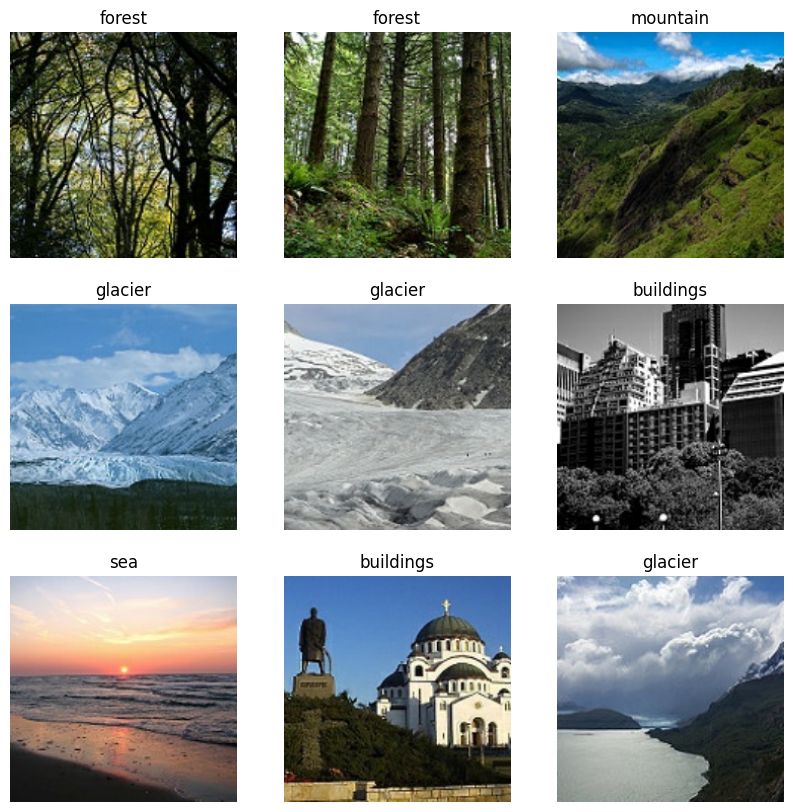

In [8]:
# Muestra algunas imágenes de ejemplo
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    class_idx = list(labels[i]).index(1)
    plt.title(class_names[class_idx])
    plt.axis("off")

In [9]:
EPOCHS= 5
model = Sequential([
    Flatten(input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)),
    Dense(16, activation="relu"),
    Dense(6, activation="softmax")  # 10 clases de CIFAR-10
])

#Compilar modelo
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

#Entrenar modelo
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS, batch_size=BATCH_SIZE)

#Evaluar modelo
test_loss, test_acc = model.evaluate(test_ds)
print(f"Precisión en test: {test_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.1671 - loss: 248.5741 - val_accuracy: 0.1750 - val_loss: 1.7907
Epoch 2/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.1796 - loss: 1.7909 - val_accuracy: 0.1750 - val_loss: 1.7904
Epoch 3/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.1805 - loss: 1.7907 - val_accuracy: 0.1750 - val_loss: 1.7903
Epoch 4/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.1800 - loss: 1.7907 - val_accuracy: 0.1750 - val_loss: 1.7903
Epoch 5/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.1796 - loss: 1.7908 - val_accuracy: 0.1750 - val_loss: 1.7903
229/229 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.0000e+00 - loss: 10.7564
Precisión en test: 0.0000


In [ ]:
# Grafica la precisión y pérdida de entrenamiento y validación
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
EPOCHS= 5
model = Sequential([
    Rescaling(1./255, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    Conv2D(32, (3, 3)),
    Activation("relu"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3)),
    Activation("relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation="relu"),
    Dense(6, activation="softmax")
])

#Compilar modelo
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

#Entrenar modelo
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS, batch_size=BATCH_SIZE)

#Evaluar modelo
test_loss, test_acc = model.evaluate(test_ds)
print(f"Precisión en test: {test_acc:.4f}")

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


439/439 ━━━━━━━━━━━━━━━━━━━━ 26s 47ms/step - accuracy: 0.4551 - loss: 1.4141 - val_accuracy: 0.6687 - val_loss: 0.8928
Epoch 2/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 33s 39ms/step - accuracy: 0.7165 - loss: 0.7516 - val_accuracy: 0.6710 - val_loss: 0.8935
Epoch 3/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.8100 - loss: 0.5241 - val_accuracy: 0.7713 - val_loss: 0.7077
Epoch 4/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.8952 - loss: 0.3053 - val_accuracy: 0.7573 - val_loss: 0.8228
Epoch 5/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9476 - loss: 0.1679 - val_accuracy: 0.7373 - val_loss: 1.0397
229/229 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.1224 - loss: 63.0669
Precisión en test: 0.1205


In [ ]:
# Grafica la precisión y pérdida de entrenamiento y validación
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
EPOCHS= 5

model = Sequential([
    Rescaling(1./255, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    RandomFlip("horizontal"),
    RandomFlip("vertical"),
    RandomTranslation(0.1, 0.1, fill_mode="reflect"),
    RandomContrast(0.2),
    Conv2D(8, (3, 3)),
    Activation("relu"),
    Conv2D(16, (3, 3)),
    Activation("relu"),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3)),
    Activation("relu"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3)),
    Activation("relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation="relu"),
    Dense(6, activation="softmax")
])

#Compilar modelo
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

#Entrenar modelo
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS, batch_size=BATCH_SIZE)

#Evaluar modelo
test_loss, test_acc = model.evaluate(test_ds)
print(f"Precisión en test: {test_acc:.4f}")

Epoch 1/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.4167 - loss: 1.4180 - val_accuracy: 0.6473 - val_loss: 0.9047
Epoch 2/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 37s 44ms/step - accuracy: 0.6419 - loss: 0.9303 - val_accuracy: 0.7053 - val_loss: 0.7628
Epoch 3/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.7100 - loss: 0.7647 - val_accuracy: 0.7747 - val_loss: 0.6275
Epoch 4/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.7434 - loss: 0.6906 - val_accuracy: 0.7690 - val_loss: 0.6194
Epoch 5/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.7700 - loss: 0.6271 - val_accuracy: 0.7780 - val_loss: 0.5922
229/229 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.1285 - loss: 30.8251
Precisión en test: 0.1260


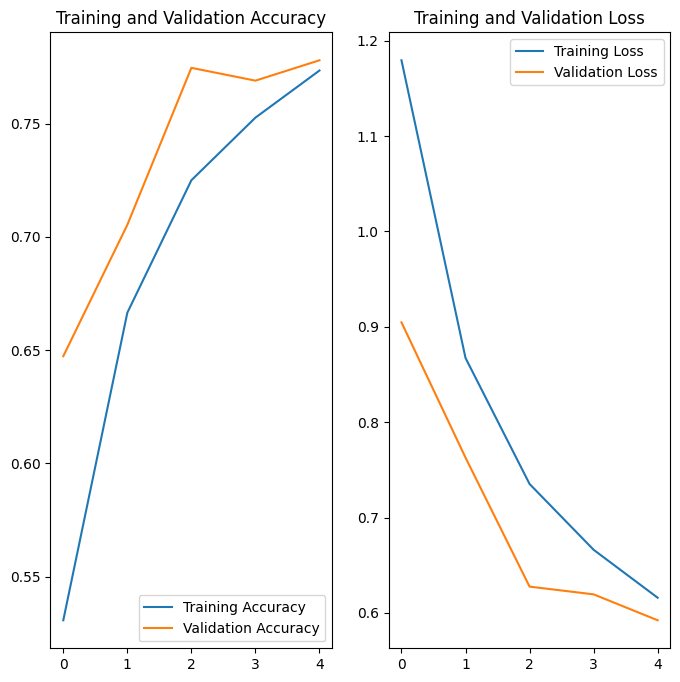

In [12]:
# Grafica la precisión y pérdida de entrenamiento y validación
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3),
                         include_top=False, weights='imagenet')
base_model.trainable = False  # Congelamos para transfer learning

model_transfer = Sequential([
    Rescaling(1./255 , input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    base_model,
    GlobalAveragePooling2D(),
    Dense(64, activation="relu"),
    Dense(6, activation="softmax")
])

#Compilar modelo
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

EPOCHS = 5

#Entrenar modelo
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS, batch_size=BATCH_SIZE)

#Evaluar modelo
test_loss, test_acc = model.evaluate(test_ds)
print(f"Precisión en test: {test_acc:.4f}")

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


439/439 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.7755 - loss: 0.6045 - val_accuracy: 0.7980 - val_loss: 0.5560
Epoch 2/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.7894 - loss: 0.5687 - val_accuracy: 0.7987 - val_loss: 0.5538
Epoch 3/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.7962 - loss: 0.5570 - val_accuracy: 0.8050 - val_loss: 0.5504
Epoch 4/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8064 - loss: 0.5362 - val_accuracy: 0.8117 - val_loss: 0.5104
Epoch 5/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.8106 - loss: 0.5308 - val_accuracy: 0.8213 - val_loss: 0.5055
229/229 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.1073 - loss: 35.5169
Precisión en test: 0.1048
